In [168]:
import pdfplumber
import pandas as pd
import re

In [318]:
filename = '2 jawa-bali.pdf'

pdf = pdfplumber.open(filename)
pageNumber = 150

targetPage = pdf.pages[pageNumber]

In [319]:
# check if this is correct page. This will open image in default app.

im = targetPage.to_image()

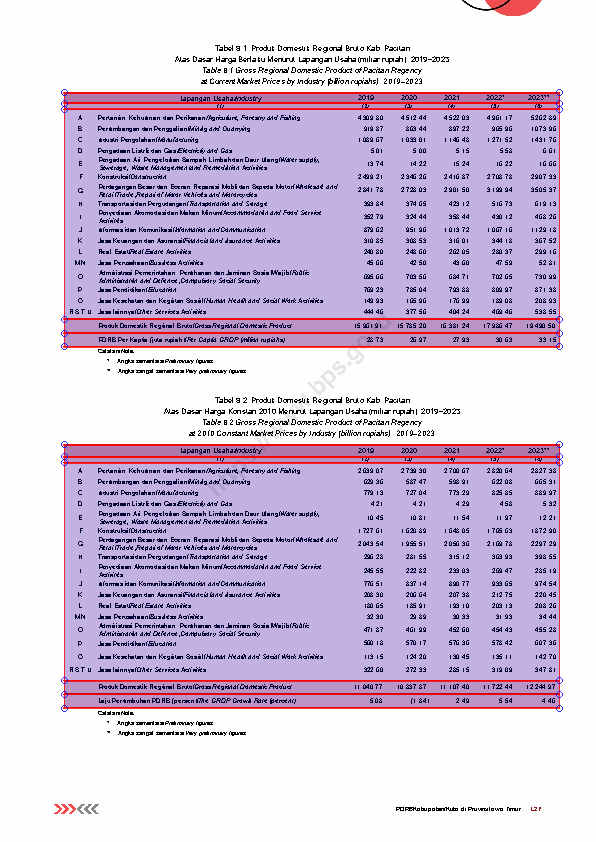

In [320]:
# check if tables are detected

im.debug_tablefinder()

In [321]:
# if the tables aren't detected correctly, set the coordinate explicitly

for char in targetPage.extract_words():
    print(f"Text: {char['text']}, Coordinates: (x0={char['x0']}, y0={char['top']}, x1={char['x1']}, y1={char['bottom']})")


Text: Tabel, Coordinates: (x0=214.32000750000003, y0=44.82019630000002, x1=233.81377894762323, y1=52.50049630000001)
Text: 8.1, Coordinates: (x0=235.88874999993394, y0=44.82019630000002, x1=246.67060114762324, y1=52.50049630000001)
Text: Produk, Coordinates: (x0=251.03289154293574, y0=44.82019630000002, x1=275.4739462458624, y1=52.50049630000001)
Text: Domestik, Coordinates: (x0=277.7613855935517, y0=44.82019630000002, x1=310.0529969411088, y1=52.50049630000001)
Text: Regional, Coordinates: (x0=312.3404362887981, y0=44.82019630000002, x1=342.8680387362891, y1=52.50049630000001)
Text: Bruto, Coordinates: (x0=345.0031621362891, y0=44.82019630000002, x1=363.45241279159256, y1=52.50049630000001)
Text: Kab., Coordinates: (x0=365.6808698392158, y0=44.82019630000002, x1=381.58020088833536, y1=52.50049630000001)
Text: Pacitan, Coordinates: (x0=383.720424483714, y0=44.82019630000002, x1=409.5427631313372, y1=52.50049630000001)
Text: Atas, Coordinates: (x0=174.95999925, y0=55.86019780000004, x1=

In [322]:
# collect x-coordinates to split text because there aren't any vertical lines

xCoordinates = [353, 396, 438, 480, 522, 554]

tables = targetPage.extract_table(table_settings={
    "vertical_strategy": "explicit",
    "explicit_vertical_lines": xCoordinates,
    "horizontal_strategy": "text",
})


In [323]:
print(tables)

[['uto Kab. Pac', 'itan', '', '', ''], ['', '', '', '', ''], ['a (miliar rupi', 'ah), 2019–2', '023', '', ''], ['', '', '', '', ''], ['of Pacitan R', 'egency', '', '', ''], ['', '', '', '', ''], ['upiahs), 201', '9–2023', '', '', ''], ['', '', '', '', ''], ['2019', '2020', '2021', '2022*', '2023**'], ['(2)', '(3)', '(4)', '(5)', '(6)'], ['', '', '', '', ''], ['4 .309,80', '4 .512,44', '4 .522,03', '4 .961,17', '5 .262,89'], ['', '', '', '', ''], ['9 19,87', '8 63,44', '8 97,22', '9 65,96', '1 .073,96'], ['', '', '', '', ''], ['1 .089,67', '1 .033,01', '1 .146,48', '1 .271,52', '1 .431,76'], ['', '', '', '', ''], ['5 ,01', '5 ,00', '5 ,15', '5 ,58', '6 ,61'], ['1 3,74', '1 4,22', '1 5,24', '1 6,22', '1 6,66'], ['', '', '', '', ''], ['2 .499,21', '2 .346,26', '2 .416,87', '2 .708,78', '2 .907,33'], ['2 .841,78', '2 .728,03', '2 .901,50', '3 .199,94', '3 .505,37'], ['', '', '', '', ''], ['3 93,84', '3 74,65', '4 23,12', '5 16,73', '6 19,13'], ['3 52,79', '3 24,44', '3 58,44', '4 30,12', '

In [324]:
df = pd.DataFrame(tables[10:], columns = columnsName)
df

,2019,2020,2021,2022,2023
0,,,,,
1,"4 .309,80","4 .512,44","4 .522,03","4 .961,17","5 .262,89"
2,,,,,
3,"9 19,87","8 63,44","8 97,22","9 65,96","1 .073,96"
4,,,,,
...,...,...,...,...,...
85,,,,,
86,,,,,
87,,,,,
88,,,,,


In [325]:
# to remove empty value we need to replace "" to NaN

df = df.replace("", pd.NA)
df = df.dropna(how='any')
df

,2019,2020,2021,2022,2023
1,"4 .309,80","4 .512,44","4 .522,03","4 .961,17","5 .262,89"
3,"9 19,87","8 63,44","8 97,22","9 65,96","1 .073,96"
5,"1 .089,67","1 .033,01","1 .146,48","1 .271,52","1 .431,76"
7,"5 ,01","5 ,00","5 ,15","5 ,58","6 ,61"
8,"1 3,74","1 4,22","1 5,24","1 6,22","1 6,66"
10,"2 .499,21","2 .346,26","2 .416,87","2 .708,78","2 .907,33"
11,"2 .841,78","2 .728,03","2 .901,50","3 .199,94","3 .505,37"
13,"3 93,84","3 74,65","4 23,12","5 16,73","6 19,13"
14,"3 52,79","3 24,44","3 58,44","4 30,12","4 68,26"
16,"8 79,62","9 51,96","1 .013,72","1 .067,16","1 .129,18"


In [326]:
df1 = df.iloc[:19]
df2 = df.iloc[20:41]

df = pd.concat([df1, df2])
print(len(df))

38


In [327]:
# reformat

def data_cleaning(value):
    # check if value is negative
    if '(' in value or ')' in value:
        value = '-' + value.replace('(', '').replace(')', '')
    else:
        # remove non numeric
        value = re.sub(r'[^\d,.-]', '', value)

    value = value.replace('.', '').replace(',', '.')
    return value

df = df.map(data_cleaning)
df

,2019,2020,2021,2022,2023
1,4309.80,4512.44,4522.03,4961.17,5262.89
3,919.87,863.44,897.22,965.96,1073.96
5,1089.67,1033.01,1146.48,1271.52,1431.76
7,5.01,5.00,5.15,5.58,6.61
8,13.74,14.22,15.24,16.22,16.66
10,2499.21,2346.26,2416.87,2708.78,2907.33
11,2841.78,2728.03,2901.50,3199.94,3505.37
13,393.84,374.65,423.12,516.73,619.13
14,352.79,324.44,358.44,430.12,468.26
16,879.62,951.96,1013.72,1067.16,1129.18


In [328]:
# find the city name

def findCityName(page):
    text = page.extract_text().split("\n")[0]
    position = text.find("Bruto")

    cityName = text[position+len("Bruto"):].strip()
    return cityName

cityName = findCityName(targetPage)
print(cityName)

Kab. Pacitan


In [329]:
# adding new columns

columnNames = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
               'M,N', 'O', 'P', 'Q', 'R,S,T,U', 'GRDP Total', 'GRDP/Capita',
               'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
               'M,N', 'O', 'P', 'Q', 'R,S,T,U', 'GRDP Total', 'GRDP Growth Rate(%)',
              ]

# checking rows length for validation
rowsLength = len(df)
midpoint = rowsLength//2

if rowsLength != 38:
    print("There might be missing rows!")

# new columns for price type
marketPriceList = ["Current Market Prices" if i < midpoint else "2010 Constant Market Prices" for i in range(rowsLength)]

df["City"] = cityName
df["Industry Code"] = columnNames
df["Market Price Type"] = marketPriceList
df

,2019,2020,2021,2022,2023,City,Industry Code,Market Price Type
1,4309.80,4512.44,4522.03,4961.17,5262.89,Kab. Pacitan,A,Current Market Prices
3,919.87,863.44,897.22,965.96,1073.96,Kab. Pacitan,B,Current Market Prices
5,1089.67,1033.01,1146.48,1271.52,1431.76,Kab. Pacitan,C,Current Market Prices
7,5.01,5.00,5.15,5.58,6.61,Kab. Pacitan,D,Current Market Prices
8,13.74,14.22,15.24,16.22,16.66,Kab. Pacitan,E,Current Market Prices
10,2499.21,2346.26,2416.87,2708.78,2907.33,Kab. Pacitan,F,Current Market Prices
11,2841.78,2728.03,2901.50,3199.94,3505.37,Kab. Pacitan,G,Current Market Prices
13,393.84,374.65,423.12,516.73,619.13,Kab. Pacitan,H,Current Market Prices
14,352.79,324.44,358.44,430.12,468.26,Kab. Pacitan,I,Current Market Prices
16,879.62,951.96,1013.72,1067.16,1129.18,Kab. Pacitan,J,Current Market Prices


In [330]:
# transform df

df_melted = df.melt(id_vars=["Industry Code", "City", "Market Price Type"], var_name="Year", value_name="GRDP")
df_melted

,Industry Code,City,Market Price Type,Year,GRDP
0,A,Kab. Pacitan,Current Market Prices,2019,4309.80
1,B,Kab. Pacitan,Current Market Prices,2019,919.87
2,C,Kab. Pacitan,Current Market Prices,2019,1089.67
3,D,Kab. Pacitan,Current Market Prices,2019,5.01
4,E,Kab. Pacitan,Current Market Prices,2019,13.74
...,...,...,...,...,...
185,P,Kab. Pacitan,2010 Constant Market Prices,2023,607.36
186,Q,Kab. Pacitan,2010 Constant Market Prices,2023,142.70
187,"R,S,T,U",Kab. Pacitan,2010 Constant Market Prices,2023,347.81
188,GRDP Total,Kab. Pacitan,2010 Constant Market Prices,2023,12244.97


In [298]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Industry Code      190 non-null    object
 1   City               190 non-null    object
 2   Market Price Type  190 non-null    object
 3   Year               190 non-null    object
 4   GRDP               190 non-null    object
dtypes: object(5)
memory usage: 7.5+ KB


In [299]:
df_melted.to_csv("test_output.csv")